# Explore qbits connectvity and minor embedding problem

Let’s take a look at the minor embedding problem. This part is NP-hard in itself, so we normally
use probabilistic heuristics to find an embedding. For instance, until the D-wave annealer 2000Q the QPU has unit cells containing a $K_{4,4}$ bipartite graph, with a structure of four horizontal qubits coupled to four vertical qubits, with two remote connections from each qubit going to qubits in neighbouring unit cells. 
A unit cell with its local and remote connections indicated is depicted following figure:

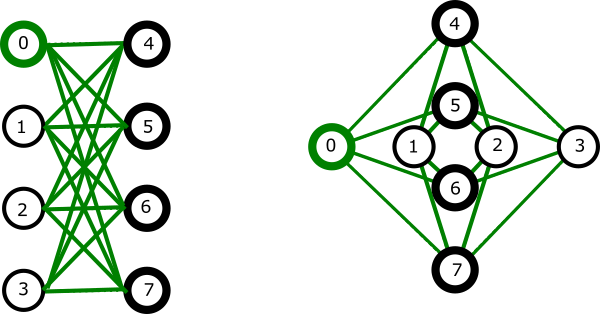
This is called the Chimera graph. The current largest hardware has 2048 qubits, consisting of
16 x 16 unit cells of 8 qubits each. The Chimera graph is available as a networkx graph in the
package dwave_networkx. We draw a smaller version, consisting of 2 x 2 unit cells.

In [ ]:
!git clone https://github.com/LINKS-Foundation-CPE/Master-QCC-2022-2023.git
%cd /content/Master-QCC-2022-2023/

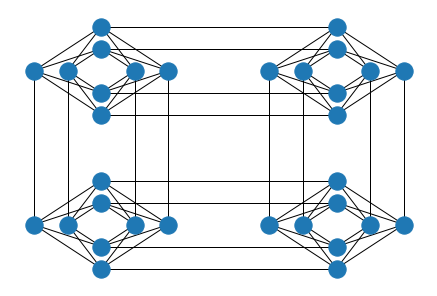

In [8]:
!pip install dwave-ocean-sdk
import matplotlib.pyplot as plt
import dwave_networkx as dnx
%matplotlib inline
connectivity_structure = dnx.chimera_graph(2, 2)
dnx.draw_chimera(connectivity_structure)
plt.show()

Chimera qubits are characterized as having:

* nominal length 4—each qubit is connected to 4 orthogonal qubits through internal couplers

* degree 6—each qubit is coupled to 6 different qubits

Let’s create a graph that certainly does not fit this connectivity structure. For instance, the
complete graph $K_n$ on nine nodes:

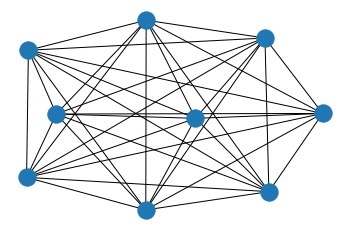

In [9]:
import networkx as nx
G = nx.complete_graph(9)
plt.axis('off')
nx.draw_networkx(G, with_labels=False)

We shall now embed this grap on our previous one:

In [10]:
import minorminer
embedded_graph = minorminer.find_embedding(G.edges(), connectivity_structure.edges())

Let’s plot this embedding:

C:\Users\ascara\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:585: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  and cb.iterable(edge_color) \
C:\Users\ascara\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:595: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  for c in edge_color]):


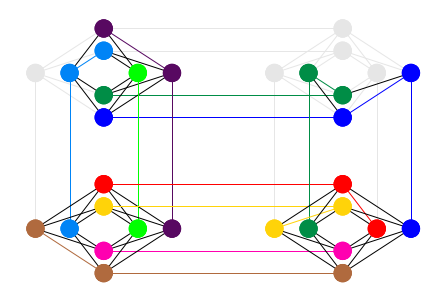

In [4]:
dnx.draw_chimera_embedding(connectivity_structure, embedded_graph)
plt.show()

Qubits that have the same colour corresponding to a logical node in the original problem defined
by the $K_9$ graph. Qubits combined in such way form a chain. Even though our problem only
has 9 variables (nodes), we used almost all 32 available on the toy Chimera graph. Let’s find the
maximum chain length:

In [6]:
max_chain_length = 0
for _, chain in embedded_graph.items():
  if len(chain) > max_chain_length:
    max_chain_length = len(chain)
print(max_chain_length)

4


The chain on the hardware is implemented by having strong couplings between the elements
in a chain -- in fact, twice as strong as what the user can set. Nevertheless, long chains can break,
which means we receive inconsistent results. In general, we prefer shorter chains, so we do not
waste physical qubits and we obtain more reliable results.

Other and more recent qibits connectivity architectures (topology) are:

1) Pegasus for Advantage QPUs

2) Zephyr for next-generation QPUs currently under development

For more information check dwave website: https://docs.dwavesys.com/docs/latest/c_gs_4.html

[1] https://arxiv.org/pdf/2003.00133.pdf